<a href="https://colab.research.google.com/github/Mrcyoga10004/Deep-Learning/blob/main/Tugas_week_2_Regression_Second_Hand_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print ('Marcelleno Yoga')
print ('1103210004')

Marcelleno Yoga
1103210004


In [2]:
import pandas as pd

In [6]:
path_dataset = '/content/secondhanddataset.csv'

In [7]:
df = pd.read_csv(path_dataset)

In [29]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [30]:
# Import semua alat yang kita butuhkan
import torch  # Library utama buat deep learning
import torch.nn as nn  # Bikin model jaringan saraf
import torch.optim as optim  # Optimizer buat update bobot model
import torch.nn.functional as F  # Aktivasi & fungsi tambahan
import numpy as np  # Bantu operasi matematika
import matplotlib.pyplot as plt  # Buat visualisasi data
from sklearn.model_selection import train_test_split  # Pisah dataset jadi training & testing
from sklearn.preprocessing import StandardScaler  # Normalisasi data
from sklearn.datasets import make_regression, make_classification  # Bikin dataset dummy
from torch.utils.data import DataLoader, TensorDataset  # Manajemen dataset di PyTorch


# Bagian 1: MLP untuk Regresi (Prediksi Angka)

In [31]:
# Buat dataset regresi (prediksi angka)
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)
y = y.reshape(-1, 1)  # Ubah ke bentuk kolom biar sesuai format PyTorch

# Pisah dataset jadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar skalanya seragam
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke format tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Masukkan ke DataLoader supaya lebih gampang di-training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [32]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.hidden1 = nn.Linear(5, 32)  # Layer pertama: input 5 fitur, output 32 neuron
        self.hidden2 = nn.Linear(32, 16) # Layer kedua: dari 32 neuron ke 16 neuron
        self.output = nn.Linear(16, 1)   # Layer terakhir: hasilkan 1 angka (prediksi)

    def forward(self, x):
        x = F.relu(self.hidden1(x))  # Aktivasi ReLU di hidden layer 1
        x = F.relu(self.hidden2(x))  # Aktivasi ReLU di hidden layer 2
        x = self.output(x)  # Output akhir tanpa aktivasi (karena regresi)
        return x

# Buat model
model = MLPRegression()

In [33]:
criterion = nn.MSELoss()  # Loss function buat regresi
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizer Adam

# Training loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 16373.6914
Epoch 10, Loss: 120.3352
Epoch 20, Loss: 137.3406
Epoch 30, Loss: 123.4036
Epoch 40, Loss: 65.5382
Epoch 50, Loss: 75.6839
Epoch 60, Loss: 96.6817
Epoch 70, Loss: 50.2322
Epoch 80, Loss: 111.1783
Epoch 90, Loss: 51.0897


In [34]:
import torch
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)

    # Konversi tensor ke numpy
    y_pred_np = y_pred.detach().cpu().numpy()
    y_test_np = y_test.detach().cpu().numpy()

    mse = mean_squared_error(y_test_np, y_pred_np)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_np, y_pred_np)

print(f"Loss pada data uji: {test_loss.item():.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Skor R^2: {r2:.4f}")

Loss pada data uji: 136.9301
MSE: 136.9302
RMSE: 11.7017
Skor R^2: 0.9885


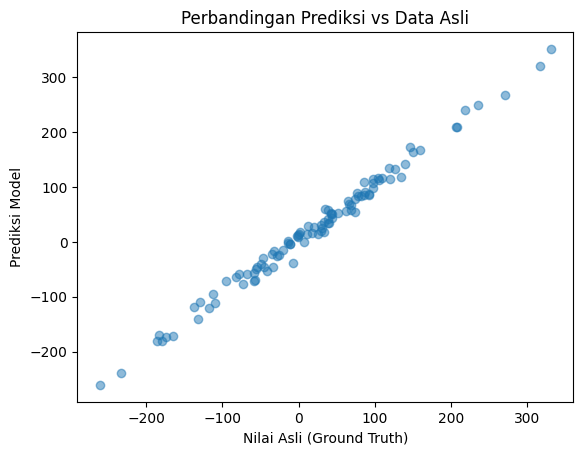

In [35]:
# Plot hasil prediksi vs data asli
y_test_np = y_test.numpy()
y_pred_np = y_pred.numpy()
plt.scatter(y_test_np, y_pred_np, alpha=0.5)
plt.xlabel("Nilai Asli (Ground Truth)")
plt.ylabel("Prediksi Model")
plt.title("Perbandingan Prediksi vs Data Asli")
plt.show()


Berdasarkan scatter plot, model menunjukkan performa prediksi yang baik dengan hubungan linear yang kuat antara nilai asli (ground truth) dan prediksi, ditunjukkan oleh sebaran titik yang mengikuti garis diagonal. Error prediksi tampak kecil karena tidak ada banyak titik yang menyimpang jauh dari garis tersebut, serta tidak ditemukan pola outlier yang mencolok. Hal ini mengindikasikan bahwa model memiliki skor R² yang tinggi, yang berarti mampu menjelaskan variasi data dengan baik. Secara keseluruhan, model bekerja dengan baik, namun evaluasi tambahan seperti analisis residual dapat dilakukan untuk memastikan tidak ada bias dalam prediksi.



# Bagian 2: MLP untuk Klasifikasi (Prediksi Kategori!)

In [18]:
# Buat dataset klasifikasi dummy (binary classification)
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Pisah dataset jadi training & testing (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Masukkan ke DataLoader buat training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [19]:
class MLPClassification(nn.Module):
    def __init__(self):
        super(MLPClassification, self).__init__()
        self.hidden1 = nn.Linear(5, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = torch.sigmoid(self.output(x))  # Pakai sigmoid buat output 0-1
        return x

model = MLPClassification()

In [20]:
criterion = nn.BCELoss()  # Binary Cross Entropy buat klasifikasi
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.3601
Epoch 10, Loss: 0.4698
Epoch 20, Loss: 0.2543
Epoch 30, Loss: 0.3697
Epoch 40, Loss: 0.1984
Epoch 50, Loss: 0.1037
Epoch 60, Loss: 0.0983
Epoch 70, Loss: 0.2670
Epoch 80, Loss: 0.0176
Epoch 90, Loss: 0.1370


In [21]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Konversi ke 0 atau 1
    acc = (y_pred == y_test).float().mean()
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9400


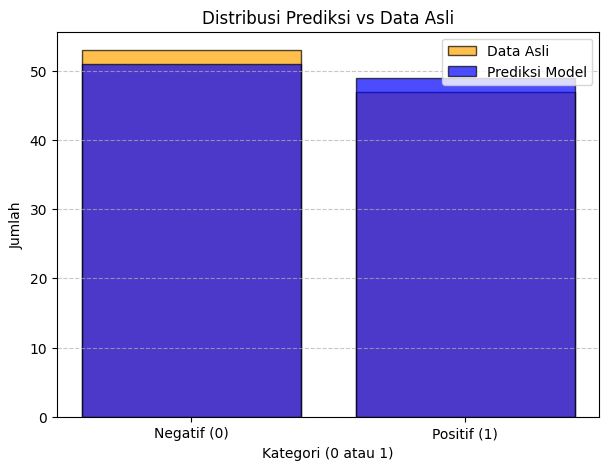

In [22]:
plt.figure(figsize=(7, 5))
plt.hist(y_test.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Data Asli", color="orange", edgecolor="black", rwidth=0.8)
plt.hist(y_pred.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Prediksi Model", color="blue", edgecolor="black", rwidth=0.8)
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.xticks([0, 1], ["Negatif (0)", "Positif (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

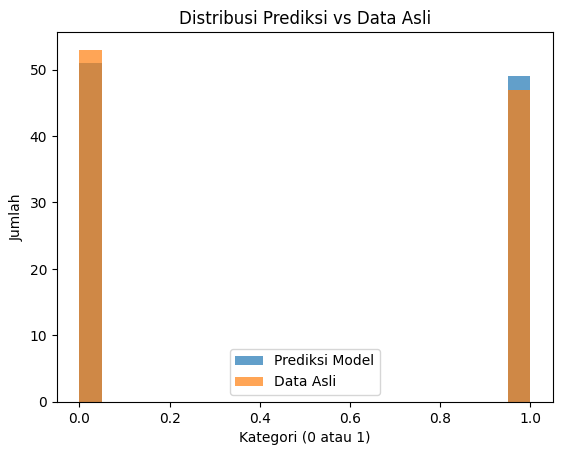

In [23]:
plt.hist(y_pred.numpy(), bins=20, alpha=0.7, label="Prediksi Model")
plt.hist(y_test.numpy(), bins=20, alpha=0.7, label="Data Asli")
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.show()

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
# Contoh dataset (regression)
X = np.random.rand(100, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100) * 0.1  # Linear regression target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32).view(-1, 1), torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# MLP Model for Regression (PyTorch)
class MLPRegressor(nn.Module):
    def __init__(self, input_size):
        super(MLPRegressor, self).__init__()
        self.hidden = nn.Linear(input_size, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

# Model, loss, optimizer
model = MLPRegressor(input_size=5)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

with torch.no_grad():
    y_pred_test = model(X_test).numpy()

mse = mean_squared_error(y_test.numpy(), y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test.numpy(), y_pred_test)

print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

X_class = np.random.rand(200, 5)
y_class = (X_class[:, 0] + X_class[:, 1] > 1).astype(int)  # Biner klasifikasi

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

model_tf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(5,)),
    layers.Dense(1, activation='sigmoid')
])

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train_c, y_train_c, epochs=100, batch_size=10, verbose=1)

y_pred_class = (model_tf.predict(X_test_c) > 0.5).astype(int)
accuracy = accuracy_score(y_test_c, y_pred_class)
print(f'Accuracy: {accuracy}')

Epoch 0, Loss: 9.053772926330566
Epoch 100, Loss: 0.021736960858106613
Epoch 200, Loss: 0.008492383174598217
Epoch 300, Loss: 0.00785813108086586
Epoch 400, Loss: 0.007594258524477482
MSE: 0.008685416541993618, RMSE: 0.0931955822021281, R^2: 0.9890099167823792
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5794 - loss: 0.6789
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6168 - loss: 0.6336  
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5908 - loss: 0.6246  
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6187 - loss: 0.5903 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6255 - loss: 0.5811 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5978 - loss: 0.5828 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6218 - loss: 0.5596 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.5422 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6723 - loss: 0.5347 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5481 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7526 - loss: 0.5167 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Accuracy: 0.9


MSE (Mean Squared Error) menghitung rata-rata kuadrat selisih antara nilai aktual dan prediksi, dirumuskan sebagai (1/n) * sum((y_actual - y_predicted)^2). RMSE (Root Mean Squared Error) adalah akar dari MSE, memberikan hasil dalam skala yang sama dengan target. R-squared (R²) mengukur seberapa baik model menjelaskan variasi data, dihitung dengan 1 - (SS_res / SS_tot), di mana SS_res adalah jumlah kuadrat residu (sum((y_actual - y_predicted)^2)) dan SS_tot adalah jumlah kuadrat total (sum((y_actual - mean(y_actual))^2)).